# ROTARY JET SPINNING

# Introduction

In the context of the Covid pandemic, the growing demand of masks requires an increasing production of them. 
The filtration is usually provided with non woven polypropylene. The entangled microfibers prevent contamination by stopping microparticules which are getting through the mask.
Currently, the Melt Blown process is used to produce the majority of masks. This project is focused on the Rotary Jet-Spinning process which is a new way of producing non woven polypropylene that need to be develop. The modelling of the Rotary Jet-Spinning process will guide the experimental work and allow to better understand experimental results.


# Modelling

All the code is available on the GitHub repository ets-lipec/processes-modelling. The language used is Python 3.

## Modelling of the Rotary Jet-Spinning process

### Concept of the process

The rotary jet-spinning, or centrifugal spinning, process is a fiber production technology where a polymer melt or solution is extruded through the orifices of a high speed rotating spinneret. The centrifugal force imparted by the spinneret provide the mechanical driving force for extrusion of the fibers. The fibers can then be collected to form a non-woven mat.

This code is designed to model this extrusion process and compute interesting parameters, such as the final fiber diameter and the critical jet ejection velocity, and the influence of processing variables.

It is based on the work of Mellado (reference [1]).

### Equations

**Predict the critical rotational velocity for jet ejection**

$\Omega _{th}=\sqrt{\frac{\sigma }{a^{2}s_{0}\rho }}$

&nbsp;

Spinneret parameters:

$\Omega _{th}$ : Critical rotational velocity for jet ejection (RPS)

$s_{0}$ : Radius of the reservoir (m)

Polymer properties:

$\sigma$ : Surface tension ($kg/s^{2}$)

a : Radius of the orifice (m)

$\rho$ : Density ($kg/m^{3}$)

*How to find this equation ?*

The threshold for jet ejection is governed by the balance between inertial and capillary forces, when the centrifugal force overcome the capillary force in the spinneret nozzle the polymer jet is ejected.

Centrifugal force : $\rho \Omega ^{2} s_{0} a^{3}$

Capillary force : $\sigma a$

By equaling those two forces, at the critical rotational speed: $\rho \Omega {_{th}}^{2} s_{0} a^{3} = \sigma a$

We obtain again the formula of the critical rotational velocity:

$\Omega _{th}=\sqrt{\frac{\sigma }{a^{2}s_{0}\rho }}$

**Predict the final radius of the fiber**

$r=\frac{a U^{1/2} \nu^{1/2} }{R_{c}^{3/2}\Omega }$


&nbsp;


r : Final radius of the fiber (m)

a : Radius of the orifice (m)

U : Initial axial velocity (m/s)

$\nu$ : kinematic viscosity of the polymer ($m^{2}/s$)

Rc : Radius of the collector (m)

$\Omega$ : Angular velocity (RPS)


*How to find this equation ?*

The radius of the fiber is obtain from the simple equilibrium, at a given extension from the extruding nozzle, between the centrifugal force pulling the fiber and the elongational viscous stress in the fiber section keeping it together. The final radius is therefore the radius computed at the end of the process when the fiber attains the reservoir, i.e. at the reservoir radius.

- Continuity equation (mass conservation) : $\partial _{x}(VA) = 0$

$\Rightarrow U \pi r_{0}^{2} = V \pi r^{2}$

Approximation : $r_{0} = a$

Thus : $V = \frac{U a^{2}}{r^{2}}$


- Kinematic viscosity : $\nu = \frac{\mu }{\rho }$

- Balance between viscous and centrifugal forces :

Viscous force : $F_{v} = \frac{\mu V}{x} \pi r^{2}$

Centrifugal force : $F_{c} = \pi \rho \Omega ^{2} r^{2} x^{2}$

Equal those 2 forces : $F_{v} = F_{c}$

Besides, we want to predict the final radius :

So, $x = R_{c} - s_{0}$

Approximation : $x = R_{c}$ , because $R_{c} \gg s_{0}$

With all this, we obtain the final radius of the fiber:

$r=\frac{a U^{1/2} \nu^{1/2} }{R_{c}^{3/2}\Omega }$


**Predict the radius of the jet in steady state as a function of the axial coordinate x**

$r=r_{0} \sqrt{\frac{\rho U x}{\mu -\Sigma +\sqrt{(\mu -\Sigma )^{2}+(\rho \Omega x^{2})^{2}}}}$

$\Sigma =\frac{\sigma x}{r_{0} U}$


&nbsp;


$\sigma$ : Surface tension ($kg/s^{2}$)

x : Axial coordinate (m)

$r_{0}$ : Initial radius of the jet = orifice radius a (m)

U : Initial axial velocity (m/s)

$\rho$ : Density ($kg/m^{3}$)

$\mu$ : Viscosity (Pa.s)

$\Omega$ : Angular velocity (RPS)


### Code

The code is structured in modules and classes in order to be more reusable. The organization of the code is shown in the following picture:

![Capture%20d%E2%80%99e%CC%81cran%202020-08-28%20a%CC%80%2013.11.42.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202020-08-28%20a%CC%80%2013.11.42.png)

- **rotary_jet_spinning** folder : contains all classes in modules

- **requirements.txt**: all required python packages to run the code are listed and need to be install with the following command for example :  

```linux
pip install -r requirements.txt
```

- **biblio.bib**: contains all the references

- **README.md**: short explanation of the code and how to use it

- **mellado_equations.md**: details the derivations of the equations used in Mellado's simple model

- **deck.yaml** : contains all the necessary inputs for the code, you can modify them to adapt the computation to your own setup.

The range of each input parameter is define by its Minimum and Maximum values.

The *Discretisation number* will define the interval discretization and the number of points in the graphs.

Complete the experimental data with your own values. Mesure the final fiber radius for different angular velocities. In the example below there are only five points but you can put as many points as you want to improve the validity of the comparison.

All values need to be set in SI units.

Adapt the values directly in the file deck.yaml before running main.py:

```YAML
Polymers:
  Name: 'Polypropylene'
  Viscosity: 0.63
  Density: 900
  Surface Tension: 0.0436

  Values used by Mellado to compare with experiment:
    Name: "Mellado's polymer PLA"
    Viscosity: 0.113
    Density: 1540
    Surface Tension: 0.027

Range Polymer Parameters:
  Minimum Viscosity: 0.1
  Maximum Viscosity: 1.0
  Minimum Density: 900
  Maximum Density: 1500
  Minimum Surface Tension: 0.02
  Maximum Surface Tension: 0.06

Machines:
  Name: 'Super Floss Maxx'
  Orifice Radius: 0.001512
  Collector Radius: 0.3302
  Reservoir Radius: 0.06985
  Angular Velocity: 57.5
  
  Values used by Mellado to compare with experiment:
    Name: "Mellado's machine"
    Orifice Radius: 0.000170
    Collector Radius: 0.135
    Angular Velocity: 200
    Initial Axial Velocity: 0.1

Range Machine Parameters:
  Minimum Orifice Radius: 0.0001
  Maximum Orifice Radius: 0.001
  Minimum Collector Radius: 0.1
  Maximum Collector Radius: 0.5
  Minimum Reservoir Radius: 0.01
  Maximum Reservoir Radius: 0.1
  Minimum Angular Velocity: 30
  Maximum Angular Velocity: 600

Graphic features:
  Discretisation: 20

Experimental Datas:
  Angular Velocities:
    - 200
    - 220
    - 260
    - 300
    - 360
    - 420
    - 480
  Final Radius:
    - 
    - 
    - 
    - 
    - 
    - 
    - 
```

- **main.py**: the only file which needs to be run. This script brings together all classes.
Run the code for the default example (Superfloss Max cotton candy machine and polypropylene) with the following command on a terminal:
```linux
python main.py
```

- **data_files** folder : contains all data required to draw the graphics in .csv files.

- **graphics** folder : contains all the graphics generated by the execution of the main.py

- **notebook** folder : contains this notebook

**Classes**

The code is structured in several classes in the folder rotary_jet_spinning:
- Deck : get values in deck.yaml
- Polymer : stock values of deck concerning the polymer in variables that will be reuse
- RJSMachine : stock the values of deck concerning the machine in variables that will be reuse
- GraphFeatures : stock the values of deck concerning the graphic features in variables that will be reuse
- RJSModel : contain all needed equations to model the process
- Data : compute and save in the data_files folder the datas for which we want to draw graphics by using equations in RJSModel
- Organization : organize the previous data in order to draw graphics
- PointGraph : draw graphics with the organized data and save it in the folder graphics
- Save : save the data required to draw the graphics in .cvs files that are stored in the folder data_files
- Experimental : stock the values of deck concerning the experimental value in variables that will be reuse
- Comparison : compare the model with experiments and save the graphic in the folder graphics

**Run the code**

In [1]:
import sys
import os

os.chdir("..")
cwd = os.getcwd()
#sys.path.append('cwd')

from rotary_jet_spinning import *

*How to get values stored in deck.yaml*

In [2]:
deck = Deck(cwd + "/" + "deck.yaml")
deck.doc['Polymers']

{'Name': 'Polypropylene',
 'Viscosity': '0.63',
 'Density': '900',
 'Surface Tension': '0.0436',
 'Values used by Mellado to compare with experiment': {'Name': "Mellado's polymer PLA",
  'Viscosity': '0.113',
  'Density': '1540',
  'Surface Tension': '0.027'}}

In [3]:
deck.doc['Polymers']['Density']

'900'

In [4]:
float(deck.doc['Polymers']['Density'])

900.0

*main.py*

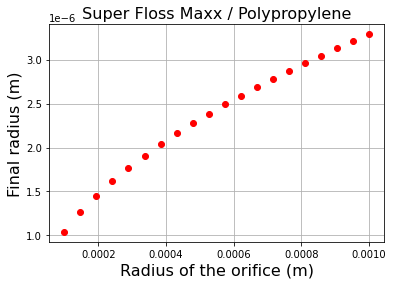

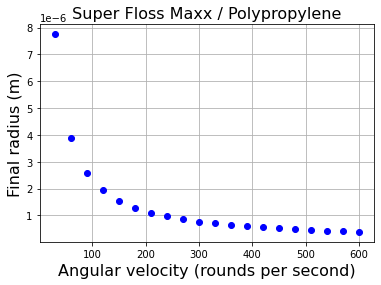

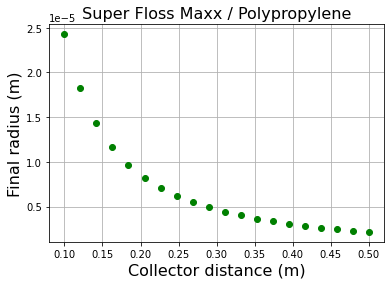

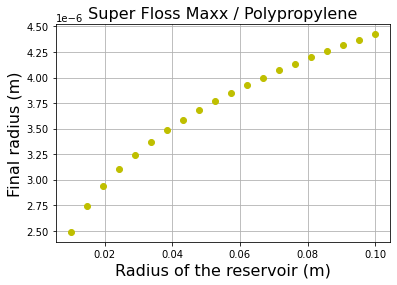

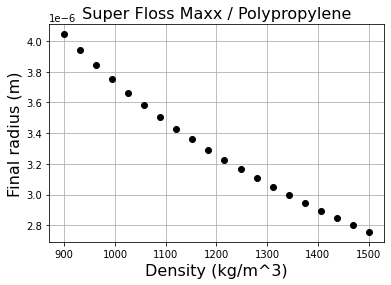

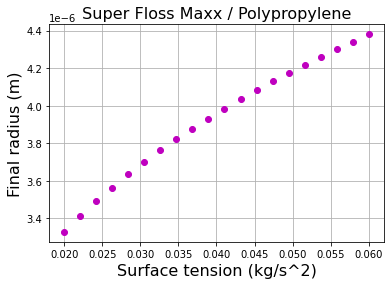

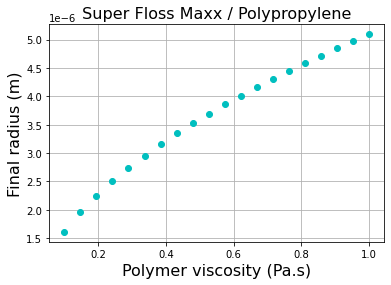

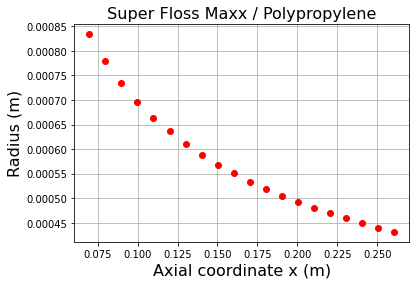

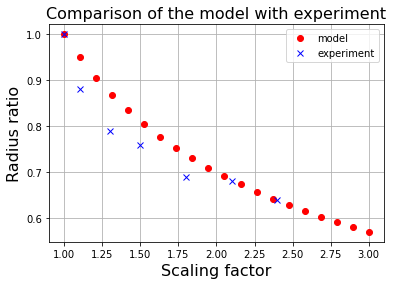

In [5]:
import os

os.makedirs(cwd + "/" + "graphics", exist_ok=True)

os.makedirs(cwd + "/" + "data_files", exist_ok=True)

deck = Deck(cwd + "/" + "deck.yaml")

polymer = Polymer(deck)

machine = RJSMachine(deck)

features = GraphFeatures(deck)

model = RJSModel(polymer, machine)

data = Data(deck, polymer, machine, model, features)

organization = Organization(data, deck, machine, polymer, model, features)

organized_data = organization.organize_data(data, deck, machine, polymer, model, features)

graph = PointGraph(organized_data)

save = Save(organized_data)

experimental = Experimental(deck)

comparison = Comparison(deck, polymer, machine, model, features, experimental)


### Curve trends

*Influence of some machine parameters on the final fiber radius*
- Higher orifice radius leads to higher final fiber diameter.
- The final fiber radius decreases exponentially as the angular velocity of the spinneret increases.
- Higher collector distance leads to lower final fiber diameter.
- Higher reservoir radius leads to higher final fiber diameter.

*Influence of some polymer properties on the final fiber radius*
- Higher polymer density leads to lower final fiber diameter.
- Higher polymer surface tension leads to higher final fiber diameter.
- Higher polymer viscosity leads to higher final fiber diameter.

*Evolution of the fiber radius from the orifice to the collector*
- The fiber radius decreases when the fiber approaches the collector.

### Example of a .cvs file containing data

In the data_files folder, for each graphic, there is a corresponding .cvs file which contains the required data to draw the graphic.

Just below, there is an example of a .cvs file with values of the final fiber radius for several angular velocities (20 points here). This data allows to draw the graph of the final fiber radius as a function of the angular velocity.

In [6]:
import pandas
df = pandas.read_csv(cwd + '/' + 'data_files' + '/' + 'PandaAngularVelocity.csv')
print(df)

    Angular Velocity  Final fiber radius
0               30.0        7.751588e-06
1               60.0        3.875794e-06
2               90.0        2.583863e-06
3              120.0        1.937897e-06
4              150.0        1.550318e-06
5              180.0        1.291931e-06
6              210.0        1.107370e-06
7              240.0        9.689484e-07
8              270.0        8.612875e-07
9              300.0        7.751588e-07
10             330.0        7.046898e-07
11             360.0        6.459656e-07
12             390.0        5.962760e-07
13             420.0        5.536848e-07
14             450.0        5.167725e-07
15             480.0        4.844742e-07
16             510.0        4.559757e-07
17             540.0        4.306438e-07
18             570.0        4.079783e-07
19             600.0        3.875794e-07


# Conclusion

This simple model of the rotary jet-spinning process allows to predict the influence over the final fiber radius of many parameters of interest such as angular velocity, collector distance, orifice radius, reservoir radius, density, surface tension and viscosity. 

The code outputs graphics of the final fiber radius as a function of these parameters.

Predicting those trends will help experimental work to get as close as possible to the wanted size of fiber radius for the intended application.

# Glossary

a : Radius of the orifice (m)

A : Jet cross sectionnal area ($m^{2}$)

r : Final radius of the fiber (m)

Rc : Radius of the collector (m)

$s_{0}$ : Radius of the reservoir (m)

U : Initial axial velocity (m/s)

V : Axial velocity (m/s)

$\mu$ : Viscosity (Pa.s)

$nu$ : kinematic viscosity ($m^{2}/s$)

$\rho$ : Density ($kg/m^{3}$)

$\sigma$ : Surface tension ($kg/s^{2}$)

$\Omega$ : Angular velocity (RPS)

$\Omega _{th}$ : Critical rotational velocity for jet ejection (RPS)

# Reference

[1] A simple model for nanofiber formation by rotary jet-spinning by Mellado (2011)